In [6]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv('fake_or_real_news.csv')

In [9]:
df.shape

(6335, 4)

In [10]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
df = df.set_index('Unnamed: 0')

In [12]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
y = df.label

In [14]:
df = df.drop('label', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [16]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
MIT License

Copyright (c) 2016 Arnaud Aliès

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""

import sys
import re

if (sys.version_info[0] < 3):
    import urllib2
    import urllib
else:
    import urllib.request
    import urllib.parse

agent = {'User-Agent':
    "Mozilla/4.0 (\
    compatible;\
    MSIE 6.0;\
    Windows NT 5.1;\
    SV1;\
    .NET CLR 1.1.4322;\
    .NET CLR 2.0.50727;\
    .NET CLR 3.0.04506.30\
    )"}


def translate(to_translate, to_language="auto", from_language="auto"):
    """Returns the translation using google translate
    you must shortcut the language you define
    (French = fr, English = en, Spanish = es, etc...)
    if not defined it will detect it or use english by default

    Example:
    print(translate("salut tu vas bien?", "en"))
    hello you alright?
    """
    base_link = "http://translate.google.com/m?hl=%s&sl=%s&q=%s"
    if (sys.version_info[0] < 3):
        to_translate = urllib.pathname2url(to_translate)
        link = base_link % (to_language, from_language, to_translate)
        request = urllib2.Request(link, headers=agent)
        page = urllib2.urlopen(request).read()
    else:
        to_translate = urllib.parse.quote(to_translate)
        link = base_link % (to_language, from_language, to_translate)
        request = urllib.request.Request(link, headers=agent)
        page = urllib.request.urlopen(request).read().decode("utf-8")
    expr = r'class="t0">(.*?)<'
    result = re.findall(expr, page)
    if (len(result) == 0):
        return ("")
    return(result[0])


In [49]:
# new_news = translate('अमेरिकी विदेश मंत्री ने अपने उत्तर कोरियाई समकक्ष के साथ परमाणु निरस्त्रीकरण की योजना के क्रियान्वयन पर गंभीर बातचीत की.  विदेश मंत्री पोम्पिओ उत्तर कोरियाई नेता किम जोंग - उन के विश्वासपात्र किम जोंग चोल से दूसरे दिन बातचीत के लिए प्योंगयांग के एक आलीशान गेस्ट हाउस में मौजूद थे. पोम्पिओ का यह तीसरा प्योगयांग दौरा है , जिसपर उनके उत्तर कोरियाई समकक्ष किम जोंग चोल ने मजाक में कहा कि उन्हें अब शायद इस शहर की आदत होने लगी है. उन्होंने कहा , ‘हम जितना मिलेंगे, उतनी हमारी दोस्ती गहरी होती जाएगी. आज की बैठक काफी सकारात्मक रही. इस पर पोम्पिओ ने कहा, हां, मैं इससे सहमत हूं. गौरतलब है कि बीते जून के महीने में ही अमेरिका के राष्ट्रपति डोनाल्ड ट्रंप और उत्तर कोरिया के तानाशाह किम जोंग उन के बीच शिखर वार्ता हुई थी. इससे पहले दोनों ही नेता एक दूसरे को देख लेने की धमकी दे रहे थे.')
new_news = translate('दुनिया की सबसे बड़ी खोजी संस्था नासा ने एक हैरान कर देने वाले रिसर्च से ये पता लगाया है कि फेसबुक, इंस्टाग्राम, व्हाट्सएप्प और ट्वीटर के बाहर भी जीवन सम्भव है. जिसके बाद दुनियाभर के लोगों में हैरानगी का माहौल है. उन्हें यकीन नहीं हो रहा है कि ऐसा भी हो सकता है!अधिक जानकारी के लिए जब हमने उस खोजी वैज्ञानिक दल के एक सदस्य साइंटिस्ट ‘विलियम जेम्स सदाशिव फर्नांडीज’ से बात की तो उन्होंने बताया कि “हमने दिन रात एक करके ये रिसर्च किया कि क्या फेसबुक व्हाट्सएप्प वगैरह से बाहर भी जीवन है? अगर हाँ तो कैसे दिखते होंगे वो लोग जो इन चीजों के बिना भी जी रहे हैं. इसी रिसर्च में हमने चार साल लगा दिए और आख़िरकार हमें सफलता मिल ही गई. हमने खोज निकाला कि इन सबसे बाहर भी जीवन है. और वहां के लोग हंसी ख़ुशी रह रहे हैं।जब से नासा ने ये ऐलान किया है कि दुनिया भर के सोशल मीडियाजीवी ऐसे लोगों को देखने के लिए बहुत उत्साहित हैं जो फेसबुक व्हाट्सएप्प के बिना जी रहे हैं. वो उनके साथ सेल्फ़ी लेकर व्हाट्सएप्प पर लगाना चाहते हैं।वहीं नासा की इस अभूतपूर्व कामयाबी के बाद डोनाल्ड ट्रम्प ने ‘ट्वीट करके‘ उन्हें उनकी कामयाबी के लिए बधाई दी है।')

In [44]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
#rand_art = count_vectorizer.transform(['In a last dash, final hail mary attempt to end a Donald Trump run for the White House once and for all, the National Review has decided to eviscerate the Republican front runner on the basis that he is not a conservative.\n\nIt will not work.\n\nPublications like National Review, run by elite conservatives have given us George W. Bush and his wars, No Child Left Behind, Medicare Part D, huge deficits caused by Republican consultants spending to woo select voters, Mitt Romneycare Romney, John McCain...the list goes on and on.\n\nWilliam F. Buckley, who founded National Review, used the magazine to publish a stellar series of essays by conservative intellectuals who helped foster the Reagan Revolution.\n\nSince then, movement conservatism has not been a powerful enough force to make things better for the working classes in the country.\n\nThis vacuum, created by the conservative elites who have backed RINOs (Republicans in Name Only) and candidates who are antithetical to conservatism, is what created the opportunity for Donald Trump to rise.In fact, publications like National Review have such a blind spot, they never even saw devout, pro-America nationalists like Trump taking off.They arent credible in their criticism of Trump because they never saw it coming.Beyond that, and most importantly, they told us we -- the conservatives who are sick and tired of elistist, establishment blunders -- were wrong.And they still dont get it.Trumps appeal stretches far beyond disgruntled, outside the country club conservatives. His potential for crossover support, especially with blue collar and working class voters, is huge. Most establishment Republicans have never met a blue collar worker (unless they were fixing their Jacuzzi).I can see Trump winning coal miners, unionized construction workers, auto workers, steel workers, Teamsters, etc.Trump may even score a larger share of black votes with his immigration stand. His appeal to working class voters is a very under reported story, but its evident because even President Barack Obama himself mentioned Trump by name during an interview with NPR in which he said that Trump is tapping into the anger of the blue collar white male.This showcases just how scared the left is when it comes to Trumps potential to tear into demographics that Democrats have largely considered theirs.The bed wetters at the RNC are dreaming of a GOP that grows because it attracts Latinos, pro-abortion millennial women and other hopelessly Democratic voters. Trumps coalition of adding working class voters (who actually work) makes more sense.I have respect for National Review as an institution, but the cover and series of articles designed to hurt Trump only hurts the elitest, Beltway crowd they represent because it exposes why he is the seemingly solid and unstoppable frontrunner: its because of them.They have failed us, not Trump. Donald Trump is merely capitalizing on a moment in a pursuit to make America Great Again, in spite of the failures of the conservative movement.Just like they were too dense to see Trumps rise, they dont understand why it occurred.National Review, its time for your Man in the Mirror moment. People are more concerned about the country they love, than they are your brand of conservatism.By trying to take out the most popular candidate in this race who has the best general election shot of any of them to win the White House and reverse the progressive policies of Barack Obama, Beltway, frat boy type elitists are proving my point: they dont get it.And from the looks of it, they never will.'])


In [50]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
rand_news = tfidf_vectorizer.transform([new_news])

In [31]:
tfidf_vectorizer.get_feature_names()[-10:]

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']

In [32]:
count_vectorizer.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000ft',
 '000km']

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [51]:
clf = MultinomialNB() 

In [52]:
clf.fit(tfidf_train, y_train)
predi = clf.predict(rand_news)

In [53]:
predi

array(['FAKE'], dtype='<U4')

In [37]:
clf.fit(tfidf_train, y_train)
pred1 = clf.predict(tfidf_test[18])

In [44]:
pred1

array(['REAL'], dtype='<U4')

In [45]:
X_test.iloc[18]

'The best kept secret of politics today is that it’s liberals, not conservatives, who are racist, but it won’t be such a secret after today. Of course, it’s always been a matter of historical record that it was the Democrats who supported not just slavery but segregation as well. \nVia TruthAndAction \n\nIn fact, they were so opposed to civil rights that they formed the Ku Klux Klan after the Civil War (remember Robert Byrd? It’s no coincidence that he was a KKK Grand Wizard you know!)\nBut instead of owning up to their past misdeeds, Democrats peddle the fiction of a “reset” that saw the racists in their party migrate to the GOP, allowing them to become a kinder, more tolerant organization. This narrative unravels, however, when one hears what one of the party’s biggest donors had to say about African-Americans who don’t vote the way he wants them to.\nAs one of the biggest donors to the Democratic Party, Benjamin Barber was easily able to gain access to a fundraiser for the Clinton c

In [46]:
y_test.iloc[18]

'FAKE'

accuracy:   0.857
Confusion matrix, without normalization


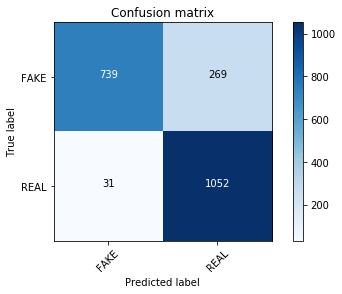

In [47]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [48]:
clf = MultinomialNB() 

accuracy:   0.893
Confusion matrix, without normalization


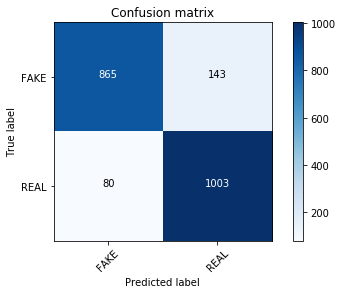

In [49]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

And indeed, with absolutely no parameter tuning, your count vectorized training set `count_train` is visibly outperforming your TF-IDF vectors!

In [50]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)

c:\users\dell exclusive\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.934
Confusion matrix, without normalization


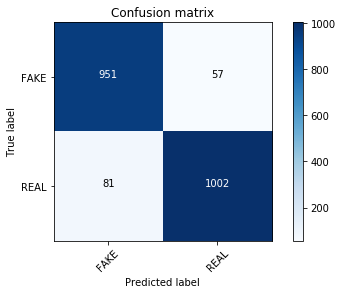

In [51]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Wow! 

I'm impressed. The confusion matrix looks different and the model classifies our fake news a bit better. We can test if tuning the `alpha` value for a `MultinomialNB` creates comparable results. You can also use [parameter tuning with grid search](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#parameter-tuning-using-grid-search) for a more exhaustive search.

In [52]:
clf = MultinomialNB(alpha=0.1)

In [53]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

c:\users\dell exclusive\appdata\local\programs\python\python36\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


Not quite... At this point, it might be interesting to perform parameter tuning across all of the classifiers, or take a look at some other [scikit-learn Bayesian classifiers](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes). You could also test with a Support Vector Machine (SVM) to see if that outperforms the Passive Aggressive classifier.

But I am a bit more curious about what the Passive Aggressive model actually *has* learned. So let's move onto introspection.

In [54]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -4.967236510436651 2016
FAKE -4.283249628591175 october
FAKE -4.074093473718641 hillary
FAKE -3.2862866152495633 share
FAKE -2.8647159190313762 article
FAKE -2.8523951871355817 november
FAKE -2.5468926170177357 oct
FAKE -2.54064554220635 print
FAKE -2.4896957741501207 email
FAKE -2.289063585243261 mosul
FAKE -2.2623974392314787 advertisement
FAKE -2.1436412256123933 election
FAKE -2.141603491496932 war
FAKE -2.0800247683662083 source
FAKE -2.0699079815233064 podesta
FAKE -2.059781289614314 nov
FAKE -1.9495116744375922 com
FAKE -1.863819525502362 wikileaks
FAKE -1.8474233623509122 establishment
FAKE -1.8310059497369637 donald
FAKE -1.8154615036779802 corporate
FAKE -1.8140849095644058 jewish
FAKE -1.711638807694632 ayotte
FAKE -1.7082826007801388 snip
FAKE -1.7062279421311823 28
FAKE -1.661413615322767 pipeline
FAKE -1.647950247561939 brexit
FAKE -1.6435173093660767 reuters
FAKE -1.612290849227857 fbi
FAKE -1.5788030082647107 photo

REAL 4.622573376421576 said
REAL 2.68376677250116

You can also do this in a pretty obvious way with only a few lines of Python, by zipping your coefficients to your features and taking a look at the top and bottom of your list.

In [55]:
feature_names = tfidf_vectorizer.get_feature_names()

In [56]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.257361214701582, 'trump'),
 (-6.494453094312678, 'said'),
 (-6.6539784739838845, 'clinton'),
 (-7.037944662867073, 'obama'),
 (-7.146539983381228, 'sanders'),
 (-7.215376008647511, 'president'),
 (-7.266562805741617, 'campaign'),
 (-7.2875931446681514, 'republican'),
 (-7.341118458599064, 'state'),
 (-7.341357110247905, 'cruz'),
 (-7.378312441985425, 'party'),
 (-7.44688067245789, 'new'),
 (-7.476288801154588, 'people'),
 (-7.547225599514773, 'percent'),
 (-7.5553074094582335, 'bush'),
 (-7.580150633909893, 'republicans'),
 (-7.5855405012652435, 'house'),
 (-7.634478172520314, 'voters'),
 (-7.648482443695299, 'rubio'),
 (-7.6734836186463795, 'states')]

In [57]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]

In [58]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [59]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

c:\users\dell exclusive\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
c:\users\dell exclusive\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
c:\users\dell exclusive\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [60]:
clf = MultinomialNB(alpha=.01)

accuracy:   0.902
Confusion matrix, without normalization


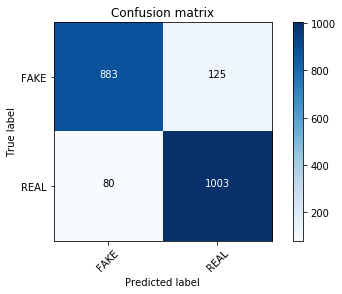

In [61]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [62]:
clf = PassiveAggressiveClassifier(n_iter=50)

c:\users\dell exclusive\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.920
Confusion matrix, without normalization


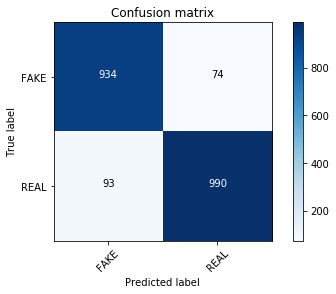

In [63]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])